Set working directory

In [2]:
import sys
import os

os.chdir("../")

os.getcwd()

'/Users/admin/Documents/GitHub/PROJECT'

Load dependables

In [3]:
from src.data_preprocess import DataPreprocessing

Load data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


check for missing data

In [6]:
print(f"Generally, there are {data.isna().sum().sum()} missing data in the whole data.")

Generally, there are 0 missing data in the whole data.


Normalize data

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [9]:
print(scaler.data_max_)

[7.76985671e-01 3.81219710e+03 4.93596677e+03 9.86271392e+00
 3.46542884e+01 4.99486963e+01 2.93994970e+03 6.80555340e+01
 1.22958919e+02 8.32150503e-01 9.46759754e+01 6.22679337e+01
 2.83933728e+03 2.89367723e+01 7.70329464e+01 3.49923265e+03
 2.34021815e+01 6.83877967e+01 3.32198511e+00 2.91144980e+02
 1.05220274e+02 9.59210788e+01 3.81005080e+01 1.71748370e+01
 2.73024639e+01 8.51084047e+00 3.32286666e+01 4.68109100e+00
 4.06302789e+01 2.51494639e+01 2.56300060e+01 3.09514344e+00
 3.78524518e+01 6.21777199e+00 7.40393188e+00 3.64996780e+00
 7.48093565e-02 3.20894918e+00 3.09193840e-01 5.75802772e+01
 4.58637268e+01 6.55092952e+01 5.88149138e+01 1.00000000e+02
 6.43327395e+01 0.00000000e+00 1.00000000e+02 4.22282080e+01
 4.72249275e+01 0.00000000e+00 3.75038950e+01 2.60354292e+01
 1.00000000e+02]


In [10]:
norm_data = scaler.transform(data)

In [11]:
import pandas as pd
norm_data = pd.DataFrame(norm_data, columns=list(data.columns))
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


In [12]:
norm_data.describe()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.0,1995.000000,1995.000000,1995.000000,1995.0,1995.000000,1995.000000,1995.0
mean,0.338212,0.348390,0.253174,0.504247,0.759433,0.745205,0.487147,0.493407,0.454430,0.322406,...,0.291408,0.503506,0.0,0.329235,0.275759,0.556852,0.0,0.799052,0.287373,0.0
std,0.147256,0.109637,0.091509,0.117060,0.107845,0.113276,0.112427,0.129945,0.127140,0.219626,...,0.167050,0.120003,0.0,0.234391,0.095323,0.148909,0.0,0.104268,0.109423,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.301572,0.279546,0.199178,0.453769,0.741000,0.724432,0.512487,0.414432,0.373422,0.224824,...,0.252041,0.466550,0.0,0.221867,0.213667,0.493839,0.0,0.791717,0.220266,0.0
50%,0.352391,0.343324,0.241174,0.507500,0.779944,0.765823,0.519955,0.493128,0.458385,0.266966,...,0.270014,0.494880,0.0,0.269123,0.275782,0.570346,0.0,0.815208,0.282128,0.0
75%,0.395261,0.410533,0.301006,0.565447,0.807618,0.799573,0.524275,0.570580,0.531408,0.477803,...,0.304379,0.571442,0.0,0.481049,0.290948,0.600913,0.0,0.836469,0.347298,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [13]:
from sklearn.decomposition import PCA


In [14]:
pca_20 = PCA(n_components = 20, random_state = 104)
pca_20.fit(norm_data)
pca_20_data = pca_20.transform(norm_data)

In [15]:
print(f"Variance explained by all 20 PCs = {sum(pca_20.explained_variance_ratio_*100)}")

Variance explained by all 20 PCs = 98.35761748484506


In [16]:
import numpy as np
import seaborn as sns

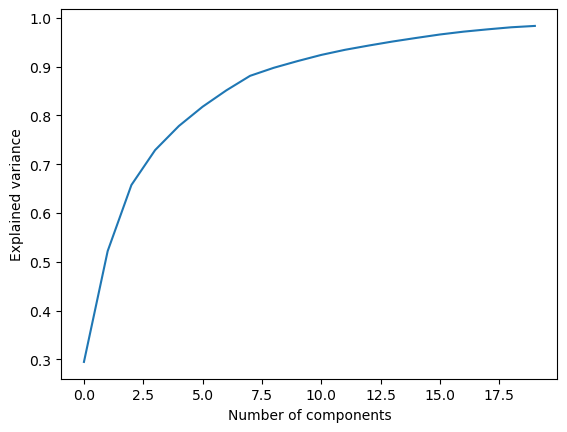

In [17]:
explained_variance = np.cumsum(pca_20.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('./reports/elbow_plot.png', dpi=100)

In [18]:
pca_ = PCA(n_components = 2, random_state = 104)
pca_.fit(norm_data)
pca_data = pca_.transform(norm_data)

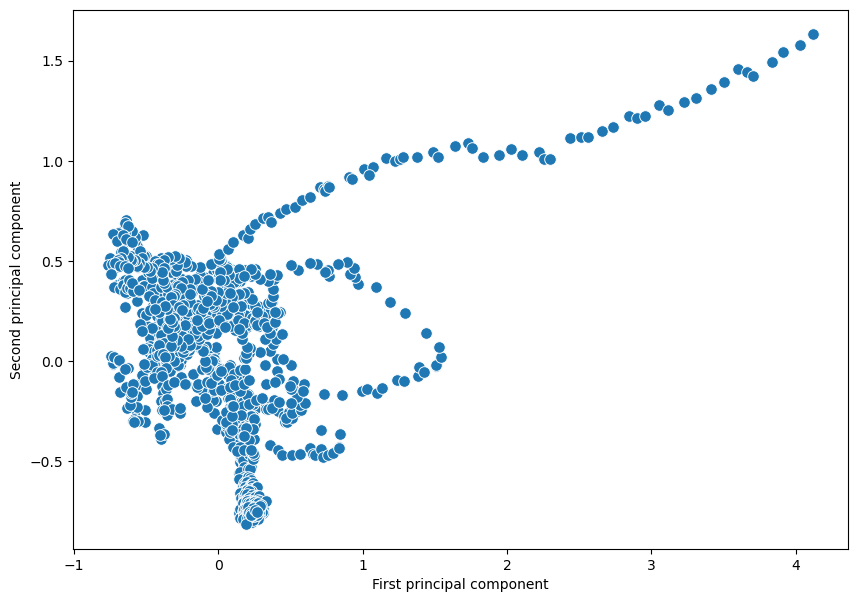

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
                x = pca_data[:, 0], 
                y = pca_data[:, 1],
                s = 70) #hue = norm_data.target, palette = ['green','blue']

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.savefig('./reports/pca_2D_scatterplot.png')


# t-SNE

In [21]:
from sklearn.manifold import TSNE

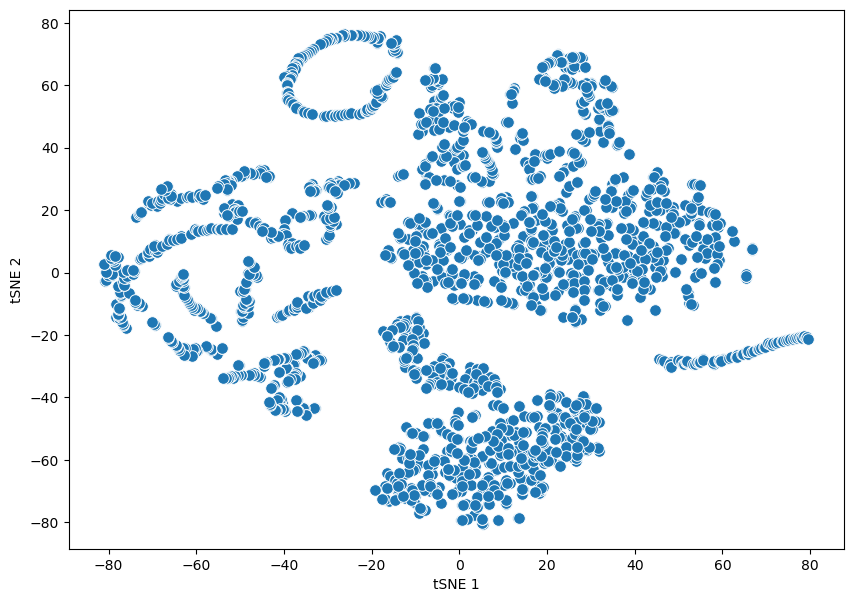

In [22]:
tSNE = TSNE(
            n_components = 2, learning_rate = 'auto',
            init = 'random', perplexity = 10)

tSNE_data = tSNE.fit_transform(norm_data)

plt.figure(figsize=(10, 7))
sns.scatterplot(
                x = tSNE_data[:, 0], 
                y = tSNE_data[:, 1],
                s = 70) #hue = norm_data.target, palette = ['green','blue']

plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.savefig('./reports/tSNE_2D_scatterplot.png')


In [25]:
perplexity = [5, 10, 15, 20, 25, 30]

result_tSNE_data = {}

for pp in perplexity:

    tSNE = TSNE(
            n_components = 2, learning_rate = 'auto',
            init = 'random', perplexity = pp)

    tSNE_data = tSNE.fit_transform(norm_data)

    result_tSNE_data['pp' + str(pp)] = tSNE_data



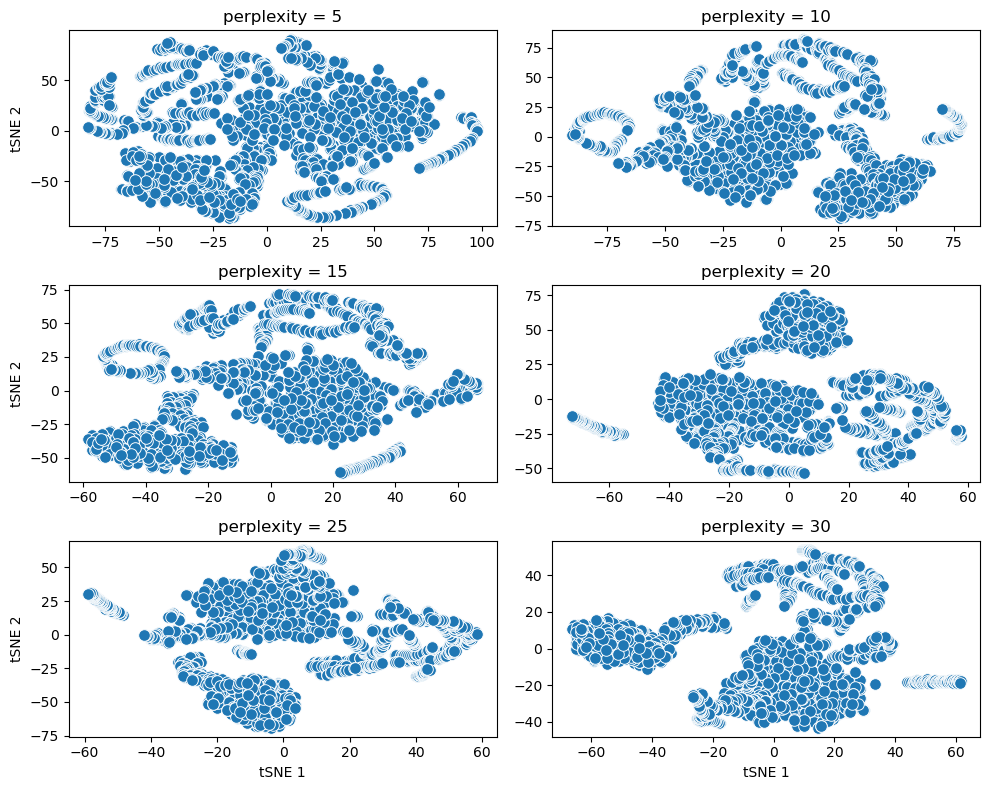

<Figure size 640x480 with 0 Axes>

In [29]:
# create a figure and a subplot grid with 3 rows and 2 columns
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# create scatter plots on the subplots using Seaborn
sns.scatterplot(x = result_tSNE_data['pp5'][:, 0], y = result_tSNE_data['pp5'][:, 1], s = 70, ax=axs[0, 0])
sns.scatterplot(x = result_tSNE_data['pp10'][:, 0], y = result_tSNE_data['pp10'][:, 1], s = 70, ax=axs[0, 1])
sns.scatterplot(x = result_tSNE_data['pp15'][:, 0], y = result_tSNE_data['pp15'][:, 1], s = 70, ax=axs[1, 0])
sns.scatterplot(x = result_tSNE_data['pp20'][:, 0], y = result_tSNE_data['pp20'][:, 1], s = 70, ax=axs[1, 1])
sns.scatterplot(x = result_tSNE_data['pp25'][:, 0], y = result_tSNE_data['pp25'][:, 1], s = 70, ax=axs[2, 0])
sns.scatterplot(x = result_tSNE_data['pp30'][:, 0], y = result_tSNE_data['pp30'][:, 1], s = 70, ax=axs[2, 1])

# set titles for each subplot
axs[0, 0].set_title('perplexity = 5'); axs[0, 0].set_ylabel('tSNE 2')
axs[0, 1].set_title('perplexity = 10')
axs[1, 0].set_title('perplexity = 15'); axs[1, 0].set_ylabel('tSNE 2')
axs[1, 1].set_title('perplexity = 20')
axs[2, 0].set_title('perplexity = 25'); axs[2, 0].set_ylabel('tSNE 2'); axs[2, 0].set_xlabel('tSNE 1')
axs[2, 1].set_title('perplexity = 30'); axs[2, 1].set_xlabel('tSNE 1')

# adjust the spacing between subplots
fig.tight_layout()

# display the figure
plt.show()

# save figure
plt.savefig('./reports/tSNE_2D_scatterplot_manyPerplexity.png')

3D

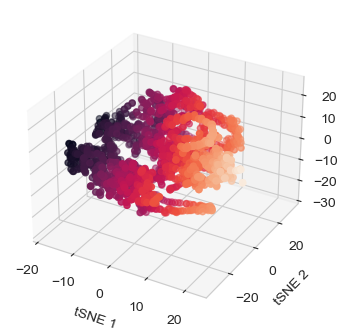

<Figure size 640x480 with 0 Axes>

In [59]:
tSNE_3N = TSNE(
            n_components = 3, learning_rate = 'auto',
            init = 'random', perplexity = 10
            )

tSNE_3N_data = tSNE_3N.fit_transform(norm_data)

fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = tSNE_3N_data[:, 0]
y = tSNE_3N_data[:, 1]
z = tSNE_3N_data[:, 2]

axs.scatter(x, y, z, c = x, marker='o')

axs.set_xlabel('tSNE 1')
axs.set_ylabel('tSNE 2')
axs.set_zlabel('tSNE 3')

plt.show()
plt.savefig('./reports/tSNE_3D_scatterplot.png')

Effect of perplexity

In [73]:
perplexity = [5, 10, 15, 20, 25, 30]

result_tSNE_3D_data = {}

for pp in perplexity:

    tSNE_3D = TSNE(
            n_components = 3, learning_rate = 'auto',
            init = 'random', perplexity = pp)

    tSNE_3D_data = tSNE_3D.fit_transform(norm_data)

    result_tSNE_3D_data['pp' + str(pp)] = tSNE_3D_data



In [77]:
result_tSNE_3D_data['pp5'].shape

(1995, 3)

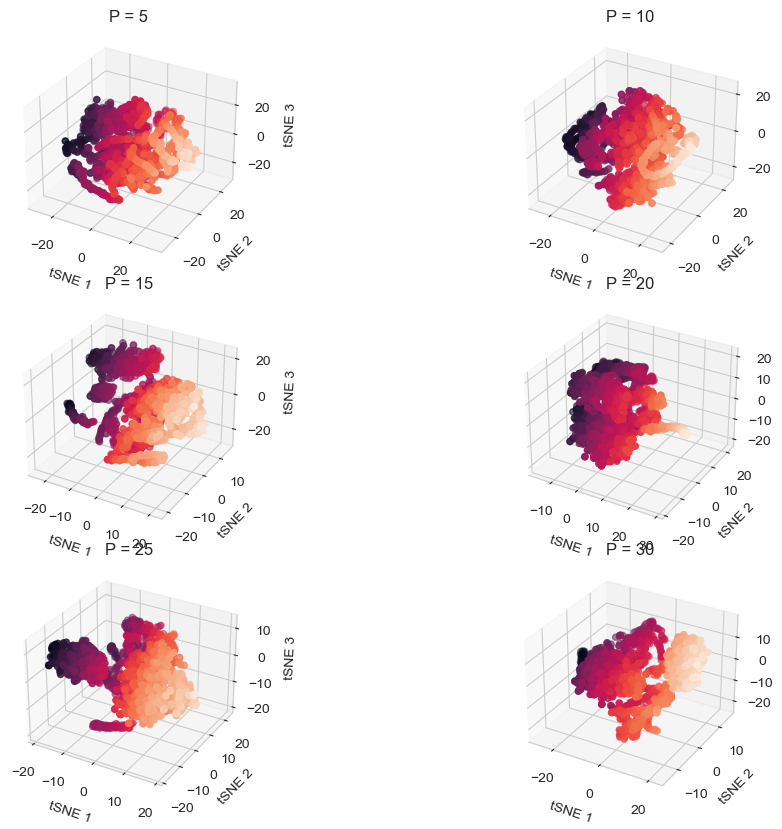

<Figure size 640x480 with 0 Axes>

In [86]:
# create a figure and a subplot grid with 3 rows and 2 columns

fig = plt.figure(figsize=(10, 8), layout='constrained')
sns.set_style("whitegrid", {'axes.grid' : False})

# create scatter plots on the subplots using Seaborn
axs321 = fig.add_subplot(321, projection='3d')
x = result_tSNE_3D_data['pp5'][:, 0]; y = result_tSNE_3D_data['pp5'][:, 1]; z = result_tSNE_3D_data['pp5'][:, 2]
axs321.scatter(x, y, z, c = x, marker='o')
axs322 = fig.add_subplot(322, projection='3d')
x = result_tSNE_3D_data['pp10'][:, 0]; y = result_tSNE_3D_data['pp10'][:, 1]; z = result_tSNE_3D_data['pp10'][:, 2]
axs322.scatter(x, y, z, c = x, marker='o')
axs323 = fig.add_subplot(323, projection='3d')
x = result_tSNE_3D_data['pp15'][:, 0]; y = result_tSNE_3D_data['pp15'][:, 1]; z = result_tSNE_3D_data['pp15'][:, 2]
axs323.scatter(x, y, z, c = x, marker='o')
axs324 = fig.add_subplot(324, projection='3d')
x = result_tSNE_3D_data['pp20'][:, 0]; y = result_tSNE_3D_data['pp20'][:, 1]; z = result_tSNE_3D_data['pp20'][:, 2]
axs324.scatter(x, y, z, c = x, marker='o')
axs325 = fig.add_subplot(325, projection='3d')
x = result_tSNE_3D_data['pp25'][:, 0]; y = result_tSNE_3D_data['pp25'][:, 1]; z = result_tSNE_3D_data['pp25'][:, 2]
axs325.scatter(x, y, z, c = x, marker='o')
axs326 = fig.add_subplot(326, projection='3d')
x = result_tSNE_3D_data['pp30'][:, 0]; y = result_tSNE_3D_data['pp30'][:, 1]; z = result_tSNE_3D_data['pp30'][:, 2]
axs326.scatter(x, y, z, c = x, marker='o')

# set titles for each subplot
axs321.set_title('P = 5'); axs321.set_xlabel('tSNE 1'); axs321.set_ylabel('tSNE 2'); axs321.set_zlabel('tSNE 3')
axs322.set_title('P = 10'); axs322.set_xlabel('tSNE 1'); axs322.set_ylabel('tSNE 2'); axs322.set_zlabel('tSNE 3')
axs323.set_title('P = 15'); axs323.set_xlabel('tSNE 1'); axs323.set_ylabel('tSNE 2'); axs323.set_zlabel('tSNE 3')
axs324.set_title('P = 20'); axs324.set_xlabel('tSNE 1'); axs324.set_ylabel('tSNE 2'); axs324.set_zlabel('tSNE 3')
axs325.set_title('P = 25'); axs325.set_xlabel('tSNE 1'); axs325.set_ylabel('tSNE 2'); axs325.set_zlabel('tSNE 3')
axs326.set_title('P = 30'); axs326.set_xlabel('tSNE 1'); axs326.set_ylabel('tSNE 2'); axs326.set_zlabel('tSNE 3')

# display the figure
plt.show()

# save figure
plt.savefig('./reports/tSNE_3D_scatterplot_manyPerplexity.png')

# Fast ICA

In [30]:
from sklearn.decomposition import FastICA

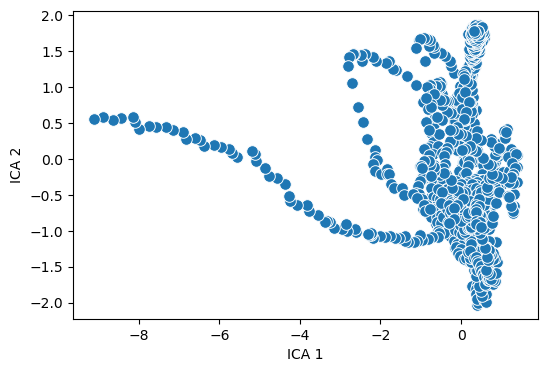

In [34]:
fastICA = FastICA(n_components=2, random_state=0, whiten='unit-variance')
fastICA_data = fastICA.fit_transform(norm_data)

plt.figure(figsize=(6, 4))
sns.scatterplot(
                x = fastICA_data[:, 0], 
                y = fastICA_data[:, 1],
                s = 70) #hue = norm_data.target, palette = ['green','blue']

plt.xlabel('ICA 1')
plt.ylabel('ICA 2')
plt.savefig('./reports/ICA_2D_scatterplot.png')

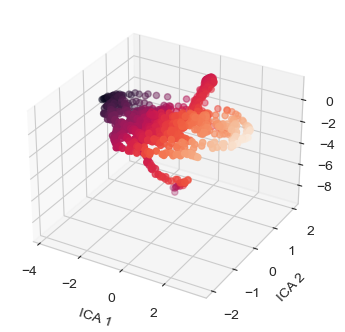

<Figure size 640x480 with 0 Axes>

In [56]:
fastICA_3N = FastICA(n_components=3, random_state=0, whiten='unit-variance')
fastICA_3N_data = fastICA_3N.fit_transform(norm_data)

fig = plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d') # Method 2

x = fastICA_3N_data[:, 0]
y = fastICA_3N_data[:, 1]
z = fastICA_3N_data[:, 2]

axs.scatter(x, y, z, c = x, marker='o')

axs.set_xlabel('ICA 1')
axs.set_ylabel('ICA 2')
axs.set_zlabel('ICA 3')

plt.show()
plt.savefig('./reports/ICA_3D_scatterplot.png')

# Isomap

In [114]:
from sklearn.manifold import Isomap

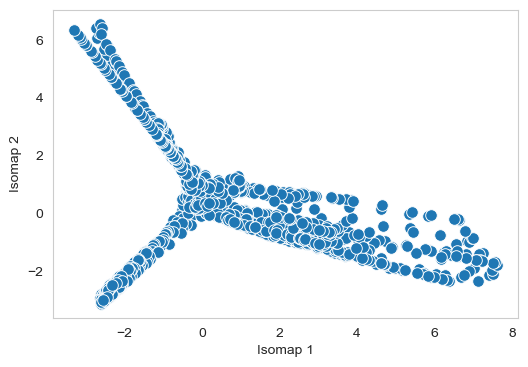

In [115]:
Isomap = Isomap(n_neighbors=5, radius=None, n_components=2)
Isomap_data = Isomap.fit_transform(norm_data)

plt.figure(figsize=(6, 4))
sns.scatterplot(
                x = Isomap_data[:, 0], 
                y = Isomap_data[:, 1],
                s = 70) 

plt.xlabel('Isomap 1')
plt.ylabel('Isomap 2')
plt.savefig('./reports/Isomap_2D_scatterplot.png')

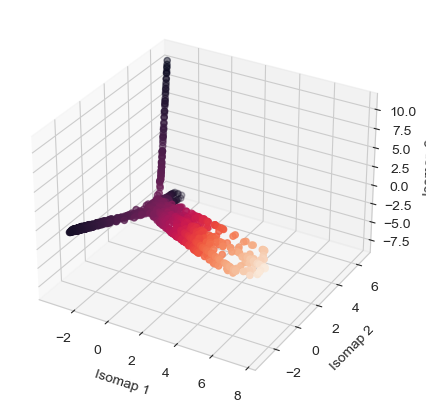

<Figure size 640x480 with 0 Axes>

In [125]:
isomap_3N = Isomap(n_neighbors=5, radius=None, n_components=3)
isomap_3N_data = isomap_3N.fit_transform(norm_data)

fig = plt.figure(figsize=(6,5), layout = None)
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = isomap_3N_data[:, 0]
y = isomap_3N_data[:, 1]
z = isomap_3N_data[:, 2]

axs.scatter(x, y, z, c = x, marker='o')

axs.set_xlabel('Isomap 1')
axs.set_ylabel('Isomap 2')
axs.set_zlabel('Isomap 3')

plt.show()
plt.savefig('./reports/Isomap_3D_scatterplot.png')

In [117]:
from sklearn.manifold import Isomap

In [107]:
neighborsint = [5, 10, 15, 20, 25, 30]

result_Ismap_data = {}

for nb in neighborsint:

    Ismap = Isomap(n_neighbors=nb, radius=None, n_components=2)

    ismap_data = Ismap.fit_transform(norm_data)

    result_Ismap_data['nb' + str(nb)] = ismap_data



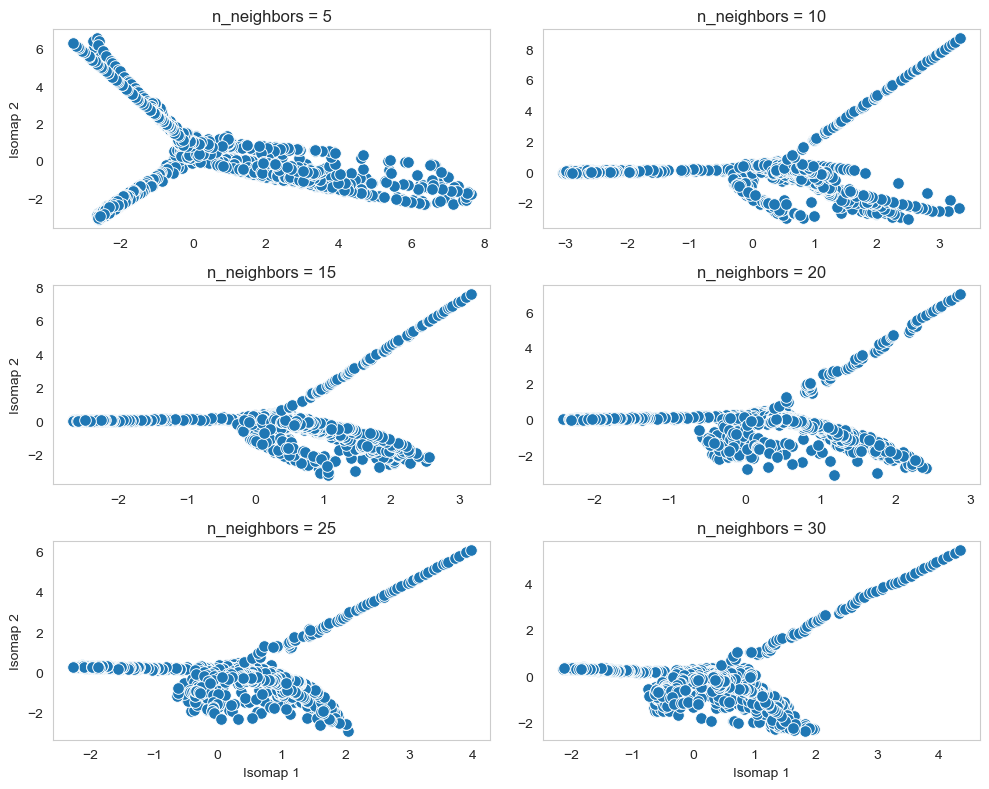

<Figure size 640x480 with 0 Axes>

In [109]:
# create a figure and a subplot grid with 3 rows and 2 columns
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# create scatter plots on the subplots using Seaborn
sns.scatterplot(x = result_Ismap_data['nb5'][:, 0], y = result_Ismap_data['nb5'][:, 1], s = 70, ax=axs[0, 0])
sns.scatterplot(x = result_Ismap_data['nb10'][:, 0], y = result_Ismap_data['nb10'][:, 1], s = 70, ax=axs[0, 1])
sns.scatterplot(x = result_Ismap_data['nb15'][:, 0], y = result_Ismap_data['nb15'][:, 1], s = 70, ax=axs[1, 0])
sns.scatterplot(x = result_Ismap_data['nb20'][:, 0], y = result_Ismap_data['nb20'][:, 1], s = 70, ax=axs[1, 1])
sns.scatterplot(x = result_Ismap_data['nb25'][:, 0], y = result_Ismap_data['nb25'][:, 1], s = 70, ax=axs[2, 0])
sns.scatterplot(x = result_Ismap_data['nb30'][:, 0], y = result_Ismap_data['nb30'][:, 1], s = 70, ax=axs[2, 1])

# set titles for each subplot
axs[0, 0].set_title('n_neighbors = 5'); axs[0, 0].set_ylabel('Isomap 2')
axs[0, 1].set_title('n_neighbors = 10')
axs[1, 0].set_title('n_neighbors = 15'); axs[1, 0].set_ylabel('Isomap 2')
axs[1, 1].set_title('n_neighbors = 20')
axs[2, 0].set_title('n_neighbors = 25'); axs[2, 0].set_ylabel('Isomap 2'); axs[2, 0].set_xlabel('Isomap 1')
axs[2, 1].set_title('n_neighbors = 30'); axs[2, 1].set_xlabel('Isomap 1')

# adjust the spacing between subplots
fig.tight_layout()

# display the figure
plt.show()

# save figure
plt.savefig('./reports/isomap_2D_scatterplot_manyNeighbors.png')

# Spectral Embedding

In [126]:
from sklearn.manifold import SpectralEmbedding

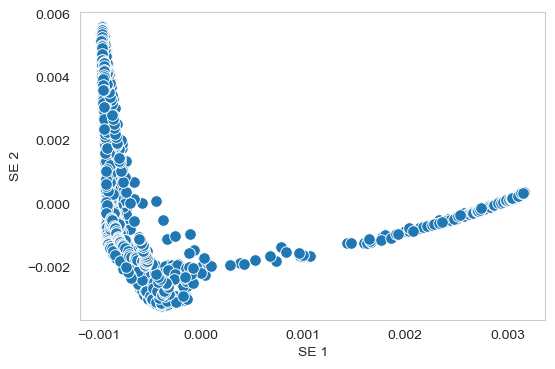

In [127]:
SE_map = SpectralEmbedding(n_components=2)
SE_map_data = SE_map.fit_transform(norm_data)

plt.figure(figsize=(6, 4))
sns.scatterplot(
                x = SE_map_data[:, 0], 
                y = SE_map_data[:, 1],
                s = 70) 

plt.xlabel('SE 1')
plt.ylabel('SE 2')
plt.savefig('./reports/SE_map_2D_scatterplot.png')

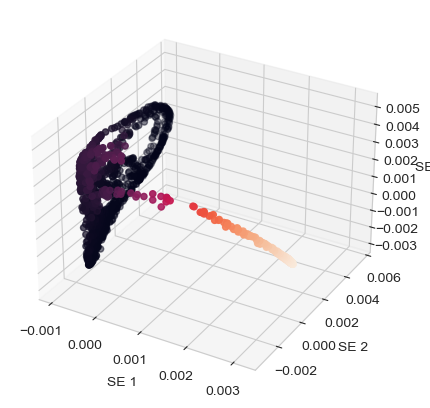

<Figure size 640x480 with 0 Axes>

In [128]:
SE_map_3N = SpectralEmbedding(n_components=3)
SE_map_data = SE_map_3N.fit_transform(norm_data)

fig = plt.figure(figsize=(6,5), layout = None)
sns.set_style("whitegrid", {'axes.grid' : False})

axs = fig.add_subplot(111, projection='3d')

x = SE_map_data[:, 0]
y = SE_map_data[:, 1]
z = SE_map_data[:, 2]

axs.scatter(x, y, z, c = x, marker='o')

axs.set_xlabel('SE 1')
axs.set_ylabel('SE 2')
axs.set_zlabel('SE 3')

plt.show()
plt.savefig('./reports/SE_map_3D_scatterplot.png')